In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Ticket', 'Parch'], axis= 1)

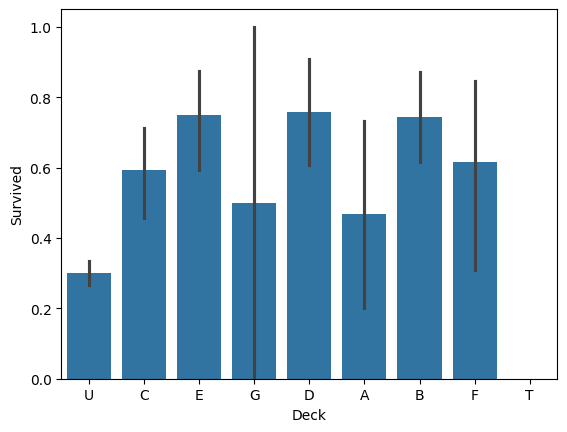

In [ ]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Deck'] = df['Cabin'].str[0]
sns.barplot(x='Deck', y='Survived', data=df)
plt.show()

This code does the following:

1.  `df['Cabin'] = df['Cabin'].fillna('Unknown')`: This line fills any missing values in the 'Cabin' column with the string 'Unknown'. This is done to handle the large number of missing cabin numbers in the dataset.

2.  `df['Deck'] = df['Cabin'].str[0]`: This line creates a new column called 'Deck' by taking the first letter of the 'Cabin' number. This is a way of extracting the deck level from the cabin information. For cabins that were filled with 'Unknown', the deck will be 'U'.

3.  `sns.barplot(x='Deck', y='Survived', data=df)`: This line creates a bar plot using the seaborn library. It shows the survival rate ('Survived') for each deck ('Deck').

4.  `plt.show()`: This line displays the plot.

Based on the bar plot, we can conclude that there is a clear relationship between the deck a passenger was on and their chances of survival. Passengers on decks B, D, and E had a significantly higher survival rate compared to passengers on other decks, especially deck U (which represents unknown cabins). This suggests that the location of a passenger's cabin played a role in their ability to survive the sinking of the Titanic. It's possible that these decks were closer to lifeboats or had better access to the upper decks of the ship.

In [ ]:
df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Deck
0,3,male,22.0,7.2500,Unknown,S,0,U
1,1,female,38.0,71.2833,C85,C,1,C
2,3,female,26.0,7.9250,Unknown,S,1,U
3,1,female,35.0,53.1000,C123,S,1,C
4,3,male,35.0,8.0500,Unknown,S,0,U


In [ ]:
dummies = pd.get_dummies(df.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [ ]:
dummies = dummies.astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
df = pd.concat([df,dummies], axis= 1)
df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Deck,female,male
0,3,male,22.0,7.2500,Unknown,S,0,U,0,1
1,1,female,38.0,71.2833,C85,C,1,C,1,0
2,3,female,26.0,7.9250,Unknown,S,1,U,1,0
3,1,female,35.0,53.1000,C123,S,1,C,1,0
4,3,male,35.0,8.0500,Unknown,S,0,U,0,1


In [ ]:
df= df.drop(['Sex', 'Cabin','Embarked' ], axis = 1)
df.head()

,Pclass,Age,Fare,Survived,Deck,female,male
0,3,22.0,7.2500,0,U,0,1
1,1,38.0,71.2833,1,C,1,0
2,3,26.0,7.9250,1,U,1,0
3,1,35.0,53.1000,1,C,1,0
4,3,35.0,8.0500,0,U,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Deck'] = le.fit_transform(df['Deck'])
df.head()

,Pclass,Age,Fare,Survived,Deck,female,male
0,3,22.0,7.2500,0,8,0,1
1,1,38.0,71.2833,1,2,1,0
2,3,26.0,7.9250,1,8,1,0
3,1,35.0,53.1000,1,2,1,0
4,3,35.0,8.0500,0,8,0,1


In [ ]:
y= df.Survived
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
x= df.drop(['Survived'], axis=1)
x.head()

,Pclass,Age,Fare,Deck,female,male
0,3,22.0,7.2500,8,0,1
1,1,38.0,71.2833,2,1,0
2,3,26.0,7.9250,8,1,0
3,1,35.0,53.1000,2,1,0
4,3,35.0,8.0500,8,0,1


In [ ]:
x.columns[x.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
x.Age

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
x.Age = x.Age.fillna(x.Age.mean())
x.Age

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
len(x_train)

712

In [ ]:
x_train

,Pclass,Age,Fare,Deck,female,male
710,1,24.0,49.5042,2,1,0
188,3,40.0,15.5000,8,0,1
412,1,33.0,90.0000,2,1,0
130,3,33.0,7.8958,8,0,1
398,2,23.0,10.5000,8,0,1
...,...,...,...,...,...,...
357,2,38.0,13.0000,8,1,0
585,1,18.0,79.6500,4,1,0
665,2,32.0,73.5000,8,0,1
638,3,41.0,39.6875,8,1,0


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
model.score(x_test, y_test)

0.8044692737430168

In [ ]:
x_train

,Pclass,Age,Fare,Deck,female,male
710,1,24.0,49.5042,2,1,0
188,3,40.0,15.5000,8,0,1
412,1,33.0,90.0000,2,1,0
130,3,33.0,7.8958,8,0,1
398,2,23.0,10.5000,8,0,1
...,...,...,...,...,...,...
357,2,38.0,13.0000,8,1,0
585,1,18.0,79.6500,4,1,0
665,2,32.0,73.5000,8,0,1
638,3,41.0,39.6875,8,1,0


In [ ]:
y_train

,Survived
710,1
188,0
412,1
130,0
398,0
...,...
357,0
585,1
665,0
638,0


In [ ]:
x_test[:10]

,Pclass,Age,Fare,Deck,female,male
3,1,35.000000,53.1000,2,1,0
358,3,29.699118,7.8792,8,1,0
214,3,29.699118,7.7500,8,0,1
166,1,29.699118,55.0000,4,1,0
418,2,30.000000,13.0000,8,0,1
421,3,21.000000,7.7333,8,0,1
780,3,13.000000,7.2292,8,1,0
365,3,30.000000,7.2500,8,0,1
737,1,35.000000,512.3292,1,0,1
860,3,41.000000,14.1083,8,0,1


In [ ]:
model.predict(x_test[:10])

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
model.predict_proba(x_test[:10])

array([[7.44341683e-04, 9.99255658e-01],
       [1.32684222e-01, 8.67315778e-01],
       [9.93709590e-01, 6.29041013e-03],
       [2.88948449e-03, 9.97110516e-01],
       [9.86530994e-01, 1.34690064e-02],
       [9.92760275e-01, 7.23972456e-03],
       [9.90786678e-02, 9.00921332e-01],
       [9.93718346e-01, 6.28165416e-03],
       [2.28200285e-39, 1.00000000e+00],
       [9.94329467e-01, 5.67053265e-03]])